In [ ]:
offenseCode.head()

,CODE,NAME
0,612,LARCENY PURSE SNATCH - NO FORCE
1,613,LARCENY SHOPLIFTING
2,615,LARCENY THEFT OF MV PARTS & ACCESSORIES
3,1731,INCEST
4,3111,LICENSE PREMISE VIOLATION


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#Reading Data set
dataSet = pd.read_csv('/content/drive/MyDrive/data/crime.csv', encoding='latin-1')

offenseCode = pd.read_csv('/content/drive/MyDrive/data/offense_codes.csv',encoding='Windows-1252')

dataSet.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [ ]:
#Merging the dataSet to add Offense_Code_Names.
dataSet = pd.merge(dataSet, offenseCode, how= "left", left_on= "OFFENSE_CODE", right_on = "CODE")
#Add extra info of district
districtData = pd.DataFrame({'DISTRICT':['A1','A15','A7', 'B2','B3', 'C11', 'C6', 'D14', 'D4', 'E13', 'E18', 'E5',''], 'NAMES':['Downtown','Charlestown','East Boston','Roxbury', 'Mattapan', 'Dorchester', 'South Boston', 'Brighton', 'South End',
                           'Jamaica Plain', 'Hyde Park', 'West Roxbury', 'Unknown Location']})

#Merging the dataset based on the district key
dataSet = dataSet.merge(districtData, on = "DISTRICT")
#Renaming the data columns
dataSet=dataSet.rename(columns= {"NAMES" : "DISTRICT_NAMES","NAME":"CRIME_NAME"})

#Droping extra duplicate data due to merge
dataSet = dataSet.drop(['CODE'], axis = 1)

dataSet.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,CRIME_NAME,DISTRICT_NAMES
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)",LARCENY ALL OTHERS,Brighton
1,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)",LARCENY OTHER $200 & OVER,Brighton
2,I182070868,616,Larceny,LARCENY THEFT OF BICYCLE,D14,790,NaN,2018-09-03 06:15:00,2018,9,Monday,6,Part One,CHESTNUT HILL AVE,42.335400,-71.150257,"(42.33539970, -71.15025675)",LARCENY THEFT OF BICYCLE,Brighton
3,I182070868,616,Larceny,LARCENY THEFT OF BICYCLE,D14,790,NaN,2018-09-03 06:15:00,2018,9,Monday,6,Part One,CHESTNUT HILL AVE,42.335400,-71.150257,"(42.33539970, -71.15025675)",LARCENY BICYCLE $200 & OVER,Brighton
4,I182070842,3006,Medical Assistance,SICK/INJURED/MEDICAL - PERSON,D14,776,NaN,2018-09-03 13:32:00,2018,9,Monday,13,Part Three,PRISCILLA RD,42.344883,-71.152166,"(42.34488259, -71.15216614)",SICK/INJURED/MEDICAL - PERSON,Brighton


In [ ]:
#Further Data Preprocessing to remove Lat and Long values with -1
dataSet.Lat.replace(-1, None, inplace=True)
dataSet.Long.replace(-1, None, inplace=True)

#For visual Data Analysis
import seaborn as sns

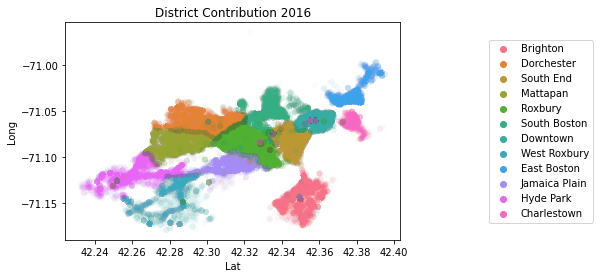

In [ ]:
#Subsetting the data for the year 2016
#Plotting the data based on the crime location and District it took place.
#Alpha with such small value helps us understand the contribution each District had in 2016 to total crimes
#This code can be used for any other year
year=2016
g= sns.scatterplot(x="Lat",y="Long",data = dataSet[dataSet['YEAR']==year],
				alpha=0.01, hue="DISTRICT_NAMES")
g.set_title("District Contribution 2016")
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

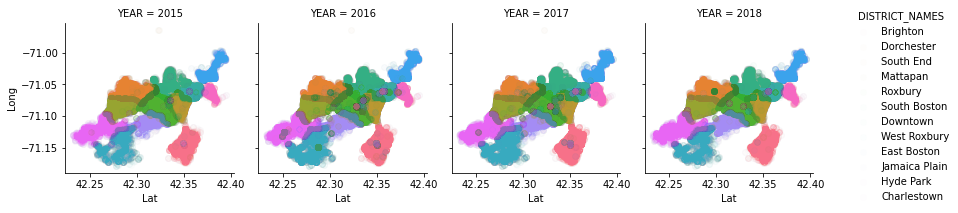

In [ ]:

#We will be using FaceGrid for plotting several scatter plots side by side for analysis
graph_grid_years = sns.FacetGrid(dataSet, col = "YEAR", hue="DISTRICT_NAMES", margin_titles=True)
graph_grid_years.map(plt.scatter,"Lat","Long",alpha=0.01,)
graph_grid_years.add_legend()

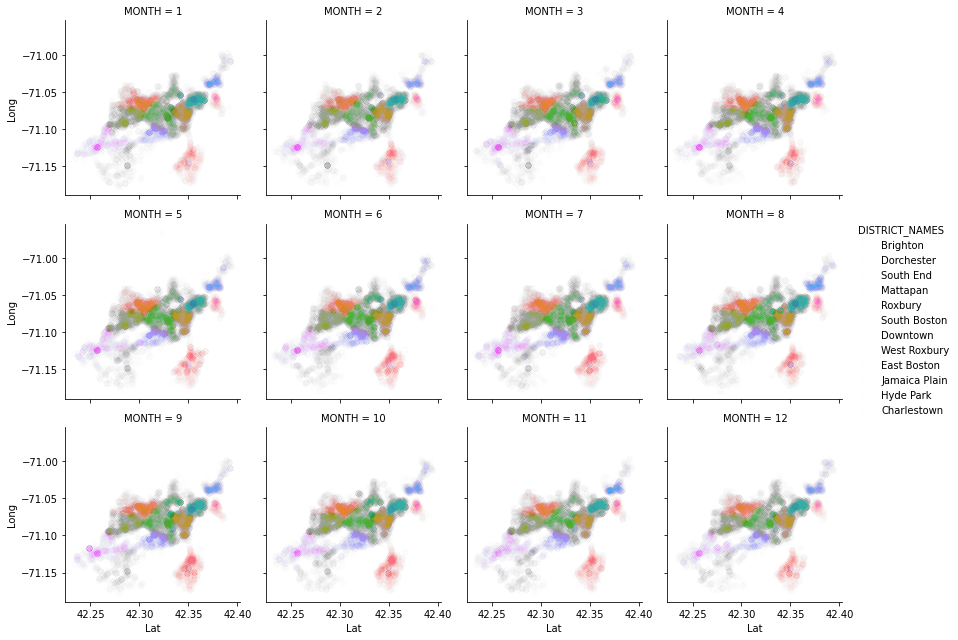

In [ ]:
#Trend over the years for specific months
year = 2017
grid_year_2017 = sns.FacetGrid(dataSet[dataSet["YEAR"]==year],
								 col = "MONTH", col_wrap=4, hue="DISTRICT_NAMES")
grid_year_2017.map(plt.scatter,"Lat","Long",alpha=0.005,)
grid_year_2017.add_legend(framealpha=1)

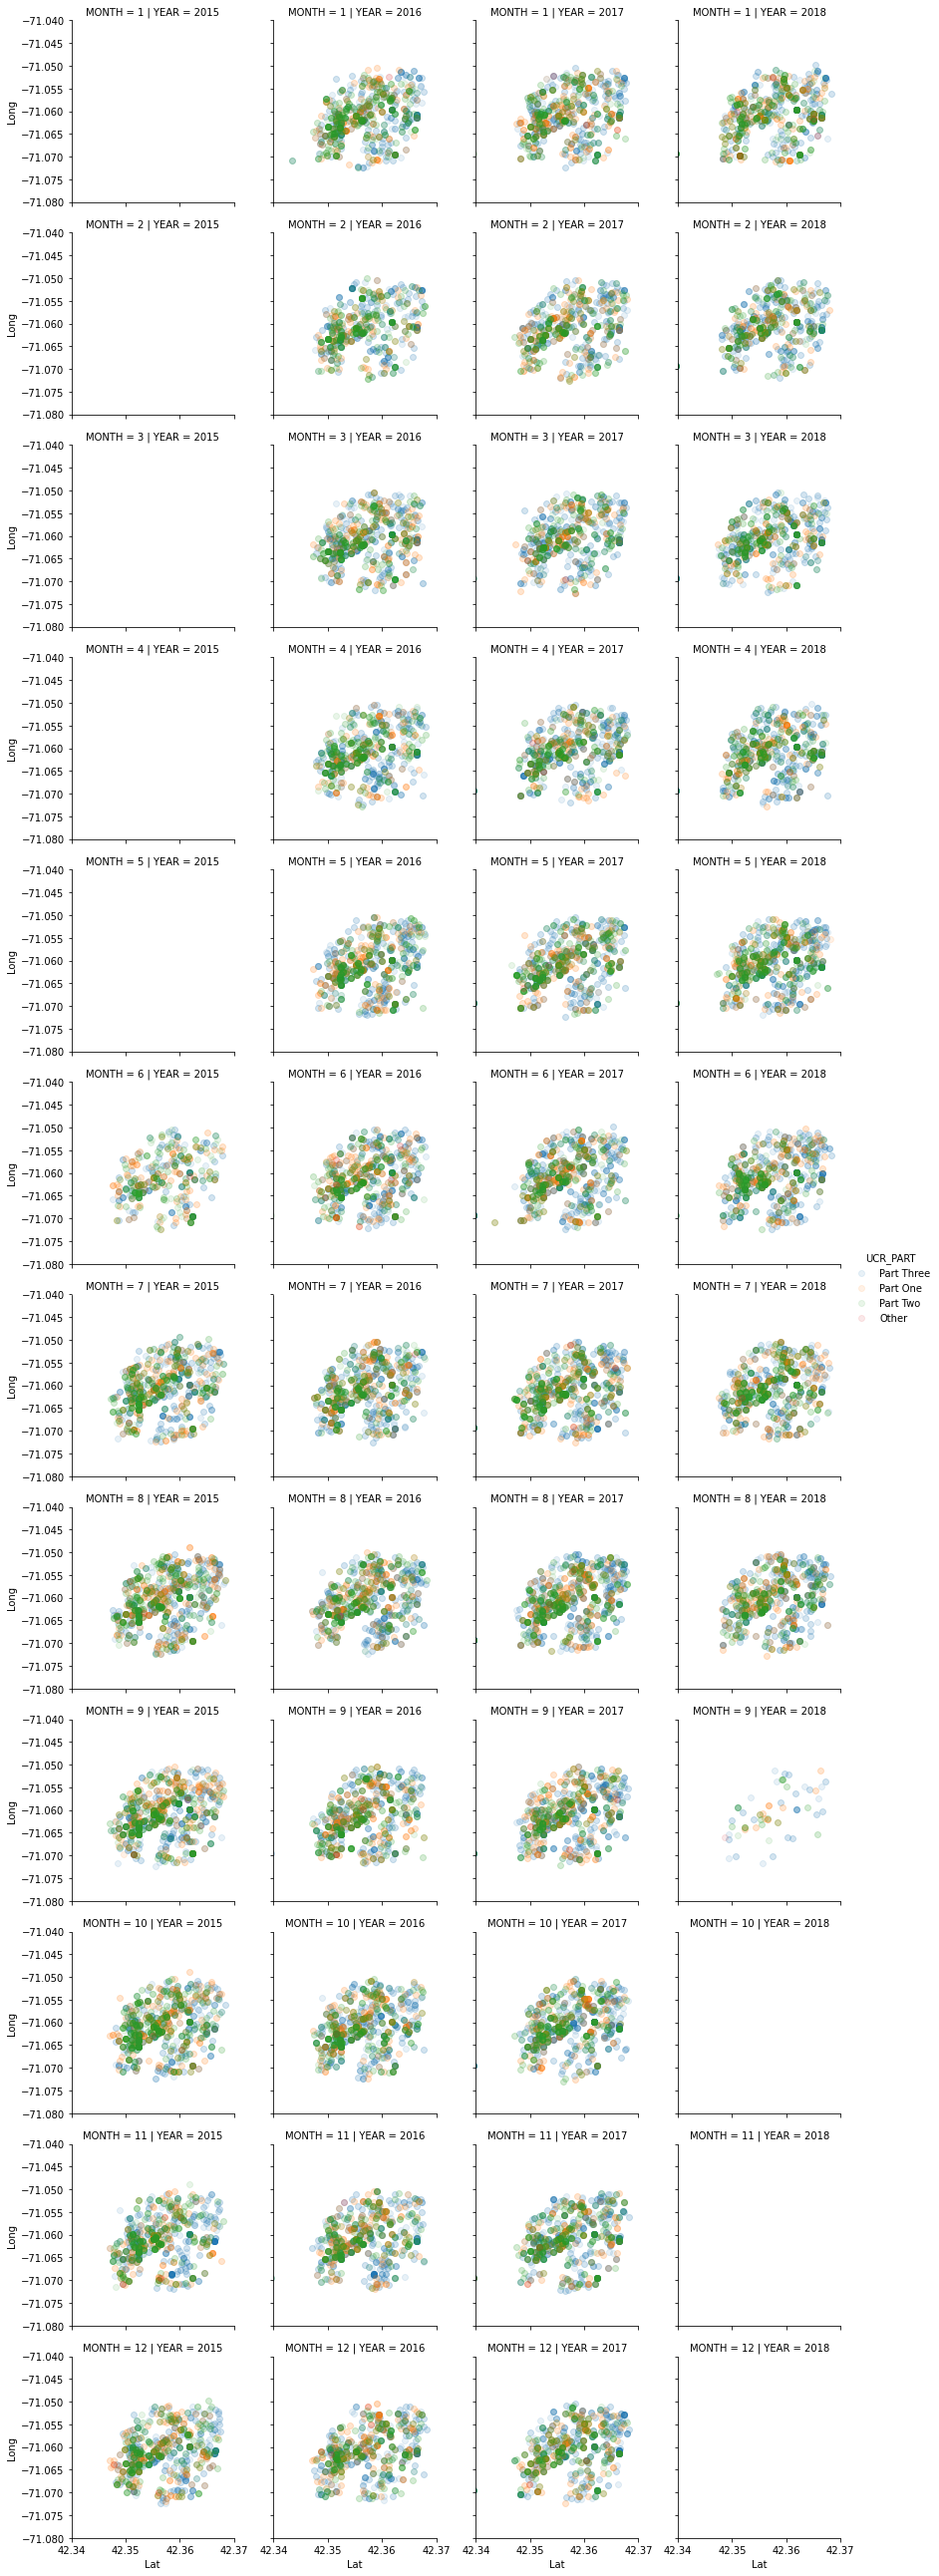

In [ ]:

#For this example we are looking into Downtown.
district = "Downtown"

graph_grid_years_area = sns.FacetGrid(dataSet[dataSet["DISTRICT_NAMES"]==district]
, row ="MONTH",col="YEAR" ,hue="UCR_PART")
#Setting the lims to ignore the outliers
graph_grid_years_area.set(ylim = (-71.08,-71.04),xlim = (42.34,42.37))
graph_grid_years_area.map(plt.scatter,"Lat","Long",alpha=0.1,)
graph_grid_years_area.add_legend()

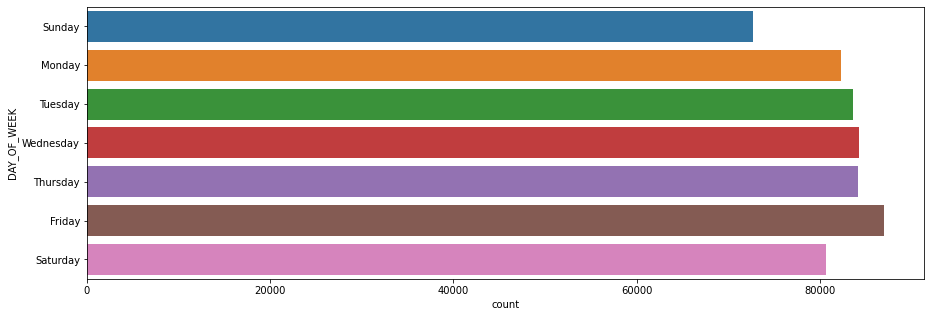

In [ ]:
plt.figure(figsize=(15,5))
cPlot=sns.countplot(y="DAY_OF_WEEK",data=dataSet,
			  order=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])

In [ ]:
uniqueIncidentCodes = dataSet['OFFENSE_CODE_GROUP'].unique()
#Forming the crosstab to extract MOST happening crimes.
crime_count = pd.crosstab(dataSet['OFFENSE_CODE_GROUP'],dataSet["YEAR"],values=dataSet.YEAR
						  ,aggfunc='count').reset_index()
#Sorting the values for each year

crime_count = crime_count.sort_values(by=[2015,2016,2017,2018],ascending= [0,0,0,0])
#Most Happening Crimes top 6
crime_count_worst = crime_count.head(6)
crime_count_worst

YEAR,OFFENSE_CODE_GROUP,2015,2016,2017,2018
34,Larceny,9991.0,15748.0,15582.0,10390.0
40,Medical Assistance,6053.0,13575.0,15216.0,10897.0
46,Other,5994.0,10027.0,9792.0,6928.0
43,Motor Vehicle Accident Response,5806.0,11409.0,11875.0,7564.0
63,Vandalism,5396.0,10078.0,9650.0,5604.0
61,Simple Assault,5213.0,9457.0,9767.0,7124.0


In [ ]:
name_worst_crime = crime_count_worst["OFFENSE_CODE_GROUP"]
name_worst_crime

34                            Larceny
40                 Medical Assistance
46                              Other
43    Motor Vehicle Accident Response
63                          Vandalism
61                     Simple Assault
Name: OFFENSE_CODE_GROUP, dtype: object

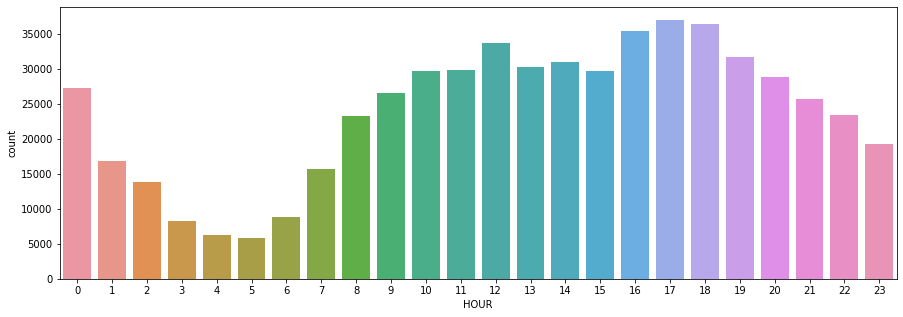

In [ ]:
plt.figure(figsize=(15,5))
cPlot=sns.countplot(x="HOUR",data=dataSet)

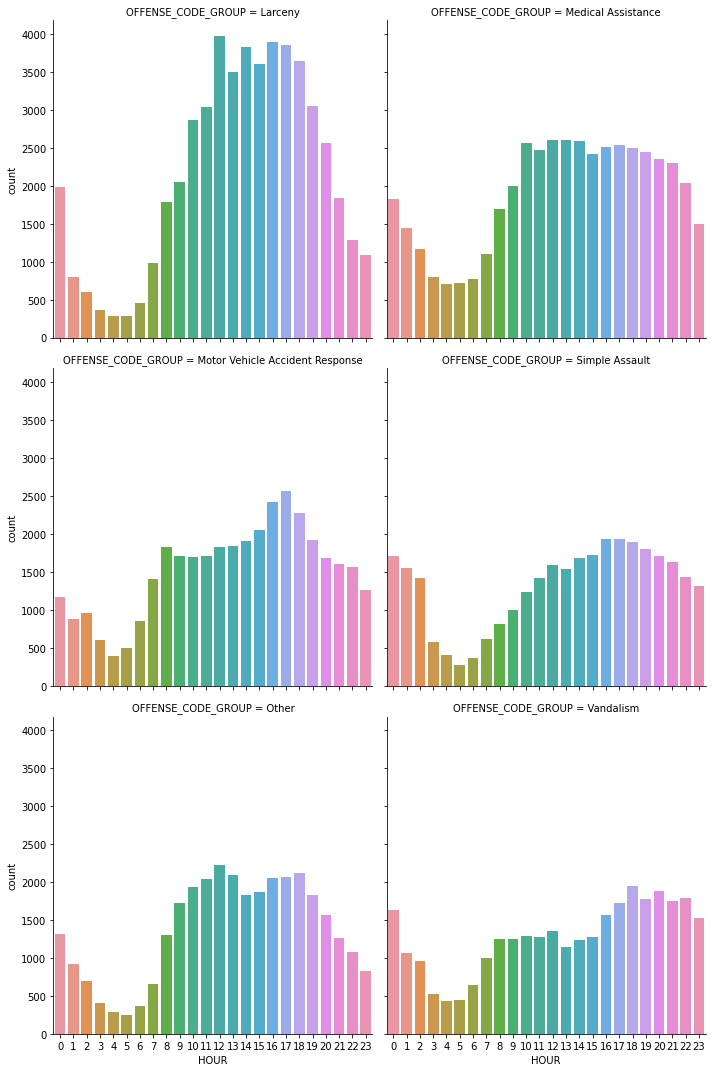

In [ ]:
cPlot = sns.catplot(x="HOUR",col="OFFENSE_CODE_GROUP",kind="count",col_wrap=2,
					data=
					dataSet[dataSet["OFFENSE_CODE_GROUP"].isin(name_worst_crime)] )

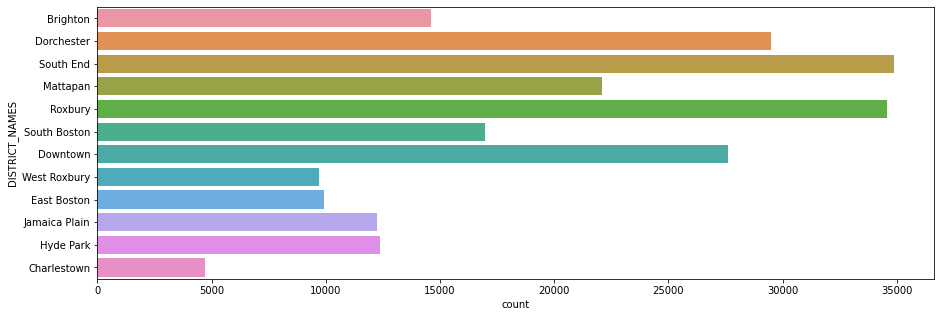

In [ ]:
plt.figure(figsize=(15,5))
wc_dataSet = dataSet[dataSet["OFFENSE_CODE_GROUP"].isin(name_worst_crime)]
cPlot=sns.countplot(y="DISTRICT_NAMES",data=wc_dataSet)

In [ ]:
#Top Distrcit Contributions to Worst Crime by number of happenings
d_contrib = pd.crosstab(wc_dataSet["DISTRICT_NAMES"],wc_dataSet["OFFENSE_CODE_GROUP"]).reset_index()
d_contrib = d_contrib.sort_values(by=name_worst_crime.head(1).iloc[0], ascending= [0])
#List of worst districts to be in Boston
name_worst_district = d_contrib.head(6)["DISTRICT_NAMES"]
name_worst_district
#This list can be further used to do analysis

10       South End
3         Downtown
8          Roxbury
2       Dorchester
9     South Boston
0         Brighton
Name: DISTRICT_NAMES, dtype: object

Text(0.5, 1.0, 'Crime by Hour in worst district ( South End )')

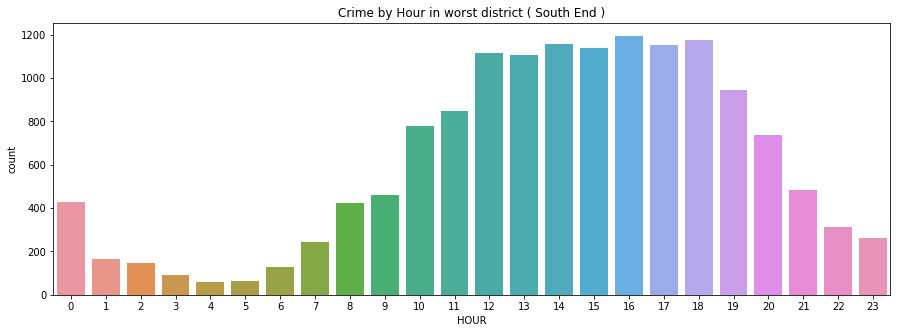

In [ ]:
wc_wd_dataSet = wc_dataSet[wc_dataSet["DISTRICT_NAMES"].isin(name_worst_district)]
#This data set contains the districts with the highest contribution to the top happening crimes in boston.
wc_wd_dataSet

#Time Division to top worst crime in Top Worst Distrcit
plt.figure(figsize=(15,5))
cPlot=sns.countplot(x="HOUR",data=wc_wd_dataSet[(wc_wd_dataSet["OFFENSE_CODE_GROUP"]
==name_worst_crime.head(1).iloc[0]) & (wc_wd_dataSet["DISTRICT_NAMES"]
==name_worst_district.head(1).iloc[0] )])
cPlot.set_title("Crime by Hour in worst district ( "+name_worst_district.head(1).iloc[0]+" )")